### IMPORTS

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

### LOAD DATA

In [55]:
# Load player information
players = pd.read_csv('../0_datasets/processed/unique_players.csv')

# Load championship information
champs = pd.read_csv('../0_datasets/processed/champions_with_team_ids.csv')

# Load statistics
stats_files = glob('../0_datasets/cleaned/stats/stats_*.csv')
stats = pd.concat((pd.read_csv(file) for file in stats_files))

# Load salaries
salary_files = glob('../0_datasets/cleaned/salaries/salaries_*.csv')
salaries = pd.concat((pd.read_csv(file) for file in salary_files))

# Load teams information
teams = pd.read_csv('../0_datasets/processed/teams_with_uuid.csv')

# Merge dataframes
merged = pd.merge(salaries, stats, on='player_uuid')
merged = pd.merge(merged, players, left_on='player_uuid', right_on='uuid')

### Players statistics / salaries

               salary_in_usd      RANK       PPG       RPG       APG   
salary_in_usd       1.000000 -0.236382  0.670716  0.635953  0.610368  \
RANK               -0.236382  1.000000 -0.365361 -0.313505 -0.263702   
PPG                 0.670716 -0.365361  1.000000  0.712902  0.788792   
RPG                 0.635953 -0.313505  0.712902  1.000000  0.510419   
APG                 0.610368 -0.263702  0.788792  0.510419  1.000000   
SPG                 0.469798 -0.278666  0.654395  0.468604  0.659137   
BPG                 0.405912 -0.167182  0.429489  0.612624  0.228681   
USG%                0.375726 -0.191796  0.615279  0.345931  0.475739   
TO%                 0.031031  0.097938 -0.045145  0.023896  0.048727   
eFG%                0.058058 -0.193595  0.204495  0.169021  0.080047   
TS%                 0.085287 -0.202301  0.240325  0.179972  0.101513   

                    SPG       BPG      USG%       TO%      eFG%       TS%  
salary_in_usd  0.469798  0.405912  0.375726  0.031031  0.05

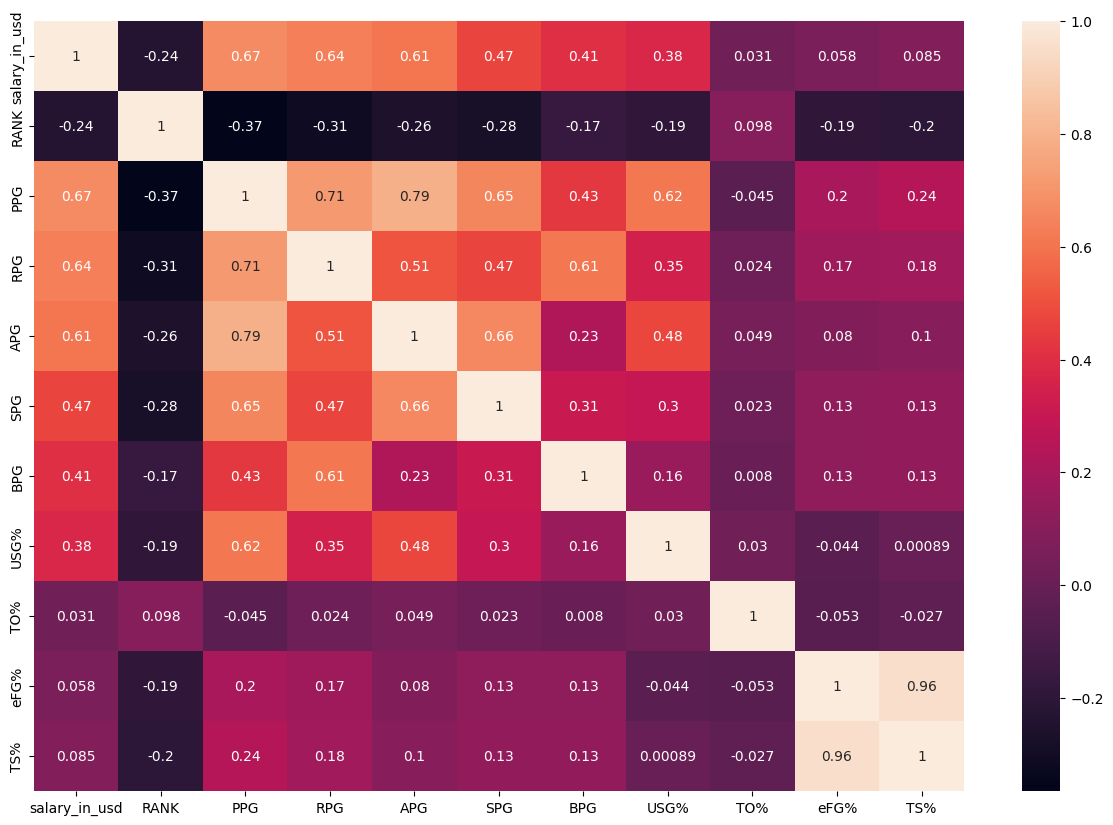

In [59]:
performance_metrics = ['RANK', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'USG%', 'TO%', 'eFG%', 'TS%']
correlations = merged[['salary_in_usd'] + performance_metrics].corr()

print(correlations)

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlations, annot=True)
plt.show()

### Teams championships / salaries overall

               salary_in_usd     count
salary_in_usd       1.000000  0.431753
count               0.431753  1.000000


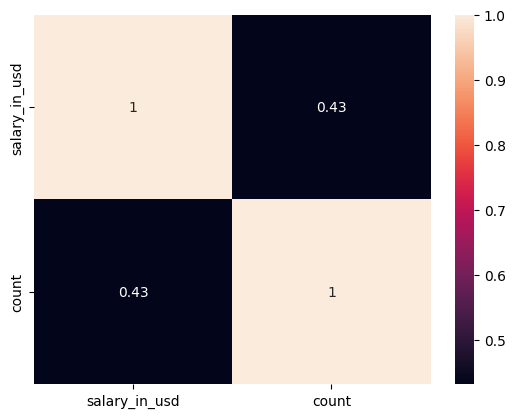

In [57]:
team_salaries = merged.groupby('team_uuid')['salary_in_usd'].sum()

# Now count the number of championships for each team.
team_championships = champs['champion_uuid'].value_counts()

# Merge these two dataframes
team_data = pd.merge(team_salaries, team_championships, left_index=True, right_index=True)

# Now calculate correlation between salary and number of championships
correlation = team_data.corr()
print(correlation)

# Visualize this as well
sns.heatmap(correlation, annot=True)
plt.show()

### Teams champions / salaries (last 4 years)

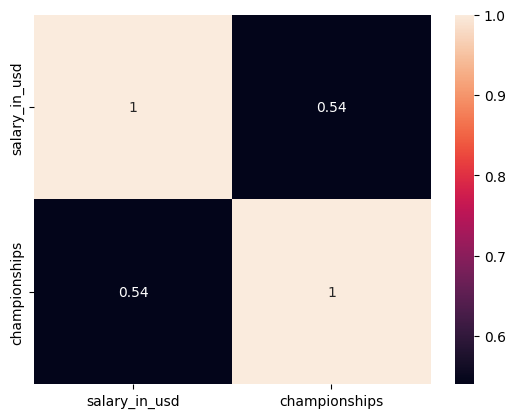

In [58]:
team_salaries = merged.groupby('team_uuid')['salary_in_usd'].sum()

# Now count the number of championships for each team.
champs = champs[champs.year >= 2019]
team_championships = champs['champion_uuid'].value_counts()

# Create a dataframe for all teams with initial championships count as 0
team_championships_all = pd.DataFrame(index=teams['uuid'], data={'championships': 0})

# Add actual counts for the teams that won championships
team_championships_all.loc[team_championships.index, 'championships'] = team_championships.values

# Merge these two dataframes
team_data = pd.merge(team_salaries, team_championships_all, left_index=True, right_index=True, how='left')

# Calculate correlation between salary and number of championships
correlation = team_data.corr()

# Visualize this as well
sns.heatmap(correlation, annot=True)
plt.show()